In [1]:
import numpy as np
import subprocess
import win32gui
import time
import pyautogui

In [13]:
# ”どうぶつタワー”で強化学習を実行するためのラッパークラス。
# openAI gymに似たようなインタフェースで動かせるが、そこまで真面目に合わせてないので細部は違うので注意。
class AnimalTower:
    # 引数n_digitize_xでx方向の離散化の細かさ（スカラ値）を受け取り、各種変数の初期化及びゲームの起動を行う。
    # ゲームの起動部分は自分の環境でしか動かないので注意
    def __init__(self, n_digitize_x=19):
        # 回転方向の行動の離散化数
        self.n_digitize_theta = 12
        # 横軸方向の行動の離散化数
        self.n_digitize_x = n_digitize_x
        # 離散化済みの行動の総数(openAI gymのインタフェースと似せてるけど.nと_nが違うので注意)
        self.action_space_n = self.n_digitize_theta * self.n_digitize_x
        
        # 離散化済みの状態の形状を表すタプル（openAI gymのインタフェースと似せてるけど、.shapeと_shapeが違うので注意）
        self.observation_space_shape = ()
        
        # クリックする実際のx座標の指定
        self.left_x_limit = 25 # クリックして意味がありそうな左の端
        self.right_y_limit = 285 # クリックして意味がありそうな右の端
        # 実際クリックする可能性のあるポイントの配列
        self.x_positions = np.linspace(self.left_x_limit, self.right_x_limit, self.n_digitize_x)
        self.y_positions = 300 # y座標はどこでもいいので固定値
        
        # 各種ボタンの座標。最初に画像を元に取得して、以下はその値を固定値として用いる
        # 取り敢えずNoneを入れておく
        self.StartButtonLocation = None # スタートボタン 
        self.RotateButtonLocation = None # 回転ボタン 
        self.ResetButtonLocation = None # スタート画面に戻るボタン
        self.ReturnButtonLocation = None # BlueStackの方の戻るボタン
    
        
        # どうぶつタワーの起動（うちの環境でしか動かないので注意）
        # BlueStackの設定で常に最前面に来るようにしておくこと
        BlueStack = subprocess.Popen("C:\Program Files\BlueStacks\HD-RunApp.exe") # BlueStackを起動
        time.sleep(3) # ウィンドウが起動しきって先頭に来るまで待つ
        windowID = win32gui.GetForegroundWindow() # 最前面のウィンドウのIDを取得
        win32gui.MoveWindow(windowID, 0, 0, 50, 50, True) # 左上に移動しつつ限界までウィンドウを小さくする((50, 50)には実際ならない)
        
        # BlueStackのトップ画面に”どうぶつタワー”があるようにしておき、それが出るまで待つ
        # 'AnimalTowericon.png'は”どうぶつタワー”のアイコンの画像（解像度は一致させること）
        while pyautogui.locateCenterOnScreen('AnimalTowericon.png') is None:
            time.sleep(1)
            
        x, y = pyautogui.locateCenterOnScreen('AnimalTowericon.png') # ”どうぶつタワー”のアイコンの座標を取得
        pyautogui.click(x, y) # クリックして"どうぶつタワー"を起動
        time.sleep(3) # 画面が切り替わるまで待つ
        windowID = win32gui.GetForegroundWindow() # 最前面のウィンドウのIDを取得
        win32gui.MoveWindow(windowID, 0, 0, 50, 50, True) # 左上に移動しつつ限界までウィンドウを(ry
        
    def reset(self):
        
    def step(self, action):
        
    def _get_observation(self):
        
        
    def _check_done(self, observation):

IndentationError: expected an indented block (<ipython-input-13-6df7a58f6011>, line 52)

In [15]:
# どうぶつタワーの起動（うちの環境でしか動かないので注意）
# BlueStackの設定で常に最前面に来るようにしておくこと
BlueStack = subprocess.Popen("C:\Program Files\BlueStacks\HD-RunApp.exe") # BlueStackを起動
time.sleep(3) # ウィンドウが起動しきって先頭に来るまで待つ
windowID = win32gui.GetForegroundWindow() # 最前面のウィンドウのIDを取得
win32gui.MoveWindow(windowID, 0, 0, 50, 50, True) # 左上に移動しつつ限界までウィンドウを小さくする((50, 50)には実際ならない)
        
# BlueStackのトップ画面に”どうぶつタワー”があるようにしておき、それが出るまで待つ
while pyautogui.locateCenterOnScreen('AnimalTowericon.png') is None:
    time.sleep(1)
            
x, y = pyautogui.locateCenterOnScreen('AnimalTowericon.png') # ”どうぶつタワー”のアイコンの座標を取得
pyautogui.click(x, y) # クリックして"どうぶつタワー"を起動
time.sleep(3) # 画面が切り替わるまで待つ
windowID = win32gui.GetForegroundWindow() # 最前面のウィンドウのIDを取得
win32gui.MoveWindow(windowID, 0, 0, 50, 50, True) # 左上に移動しつつ限界までウィンドウを(ry

<PIL.Image.Image image mode=RGB size=295x525 at 0x184BE1FC710>


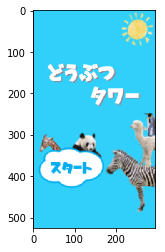

In [20]:
import matplotlib.pyplot as plt
fullscreenshot = pyautogui.screenshot(region = (5, 50, 295, 525))
print(fullscreenshot)
plt.imshow(fullscreenshot)
plt.show()

In [6]:
print(pyautogui.locateCenterOnScreen('Reseticon.png') is None)

True


In [52]:
x, y = pyautogui.locateCenterOnScreen('Starticon.png')
pyautogui.click(x, y)

TypeError: 'NoneType' object is not iterable

In [53]:
x, y = pyautogui.locateCenterOnScreen('Rotateicon.png')
for i in range(5):
    pyautogui.click(x, y)

In [5]:
np.linspace(25, 285, 19).astype(np.uint16)

array([ 25,  39,  53,  68,  82,  97, 111, 126, 140, 155, 169, 183, 198,
       212, 227, 241, 256, 270, 285], dtype=uint16)

In [8]:
pyautogui.click(32.33232323232,3.5)